In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and insights on the dataset

In [12]:
dfm=pd.read_excel('D2.xlsx')
dfm.head()

,id,name,age,dob,nationality,gender,mother_tongue,10th_score,12th_score,main_score,entrance_rank,sat_score,Admission_status
0,440,Vivaan Raj,18,2005-08-25,India,Male,Gujarati,70.75,68.25,65.17,3339,0,Admitted
1,223,Amani Mander,17,2006-03-29,India,Male,Telugu,48.20,88.99,66.45,4621,0,Admitted
2,155,Hansh Sehgal,17,2006-02-09,India,Male,Marathi,37.57,49.81,51.83,7034,0,Not Admitted
3,890,Ivana Banerjee,17,2006-06-08,India,Male,Punjabi,69.87,56.88,75.37,4623,504,Not Admitted
4,1062,Pranay Chander,17,2006-11-16,India,Male,Malayalam,97.77,59.50,37.97,187,0,Not Admitted


In [13]:
dfm.columns

Index(['id', 'name', 'age', 'dob', 'nationality', 'gender', 'mother_tongue',
       '10th_score', '12th_score', 'main_score', 'entrance_rank', 'sat_score',
       'Admission_status'],
      dtype='object')

In [14]:
dfm.isnull().sum()

id                  0
name                0
age                 0
dob                 0
nationality         0
gender              0
mother_tongue       0
10th_score          0
12th_score          0
main_score          0
entrance_rank       0
sat_score           0
Admission_status    0
dtype: int64

In [15]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1206 non-null   int64  
 1   name              1206 non-null   object 
 2   age               1206 non-null   int64  
 3   dob               1206 non-null   object 
 4   nationality       1206 non-null   object 
 5   gender            1206 non-null   object 
 6   mother_tongue     1206 non-null   object 
 7   10th_score        1206 non-null   float64
 8   12th_score        1206 non-null   float64
 9   main_score        1206 non-null   float64
 10  entrance_rank     1206 non-null   int64  
 11  sat_score         1206 non-null   int64  
 12  Admission_status  1206 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 122.6+ KB


In [16]:
dfm.dtypes

id                    int64
name                 object
age                   int64
dob                  object
nationality          object
gender               object
mother_tongue        object
10th_score          float64
12th_score          float64
main_score          float64
entrance_rank         int64
sat_score             int64
Admission_status     object
dtype: object

## Understanding on the features and basic renaming

In [17]:
dfm.rename(columns={'Admission_status': 'Admission Decision'}, inplace=True)
dfm['Admission Decision'] = dfm['Admission Decision'].replace({'Admitted': 1, 'Not Admitted': 0})
column_to = ['name', 'dob', 'nationality', 'mother_tongue']
dfm['gender'] = dfm['gender'].replace({'Male': 0, 'Female': 1})
dfm = dfm.drop(columns=column_to)
dfm.head()

,id,age,gender,10th_score,12th_score,main_score,entrance_rank,sat_score,Admission Decision
0,440,18,0,70.75,68.25,65.17,3339,0,1
1,223,17,0,48.20,88.99,66.45,4621,0,1
2,155,17,0,37.57,49.81,51.83,7034,0,0
3,890,17,0,69.87,56.88,75.37,4623,504,0
4,1062,17,0,97.77,59.50,37.97,187,0,0


In [18]:
corr=dfm.corr()
corr.shape

(9, 9)

<Axes: >

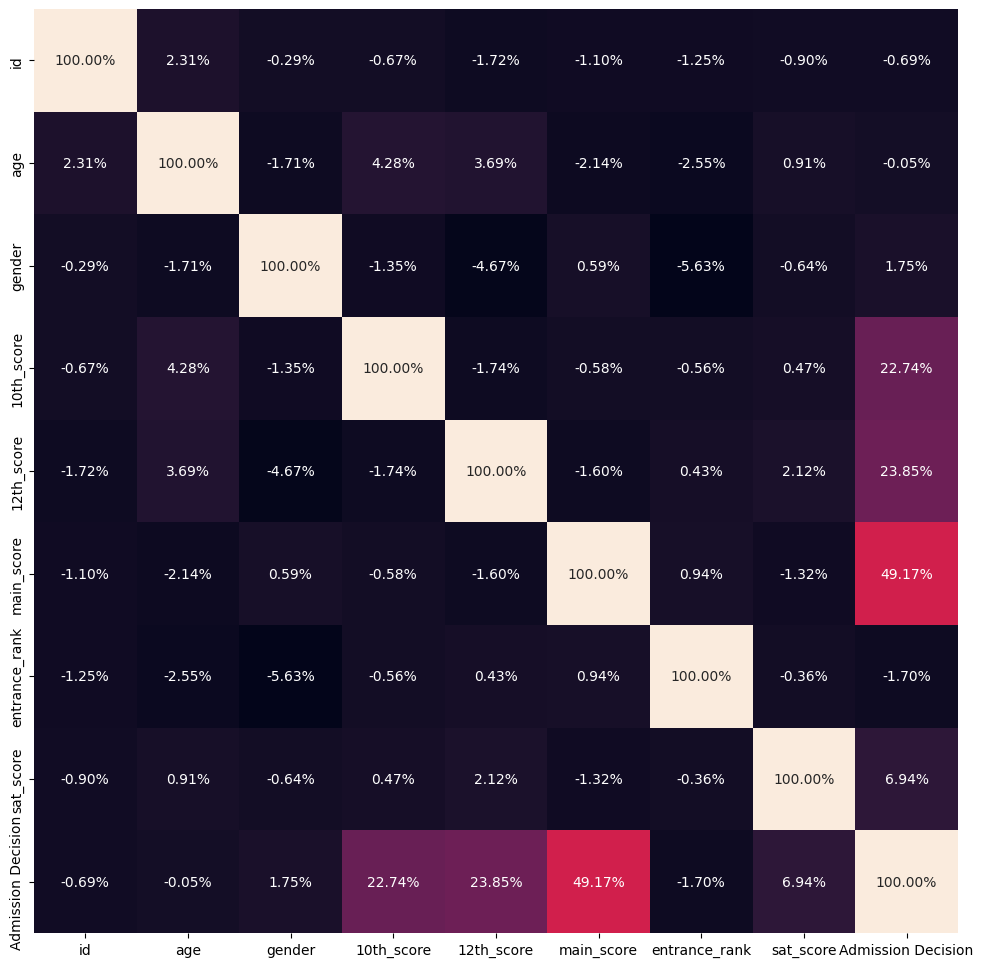

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=False, square= True, fmt='.2%', annot=True)

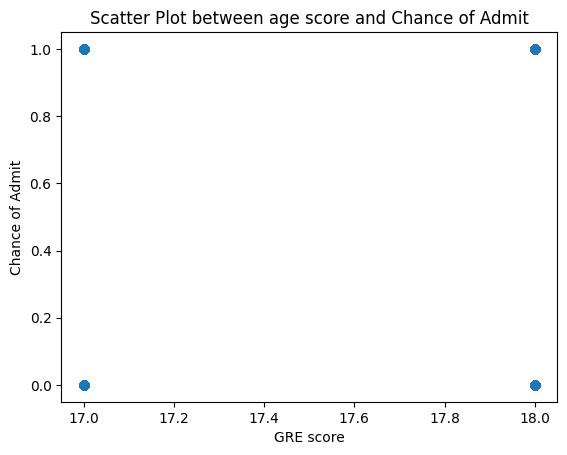

In [20]:
plt.scatter(dfm['age'], dfm['Admission Decision'])
plt.xlabel('GRE score')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between age score and Chance of Admit')
plt.show()

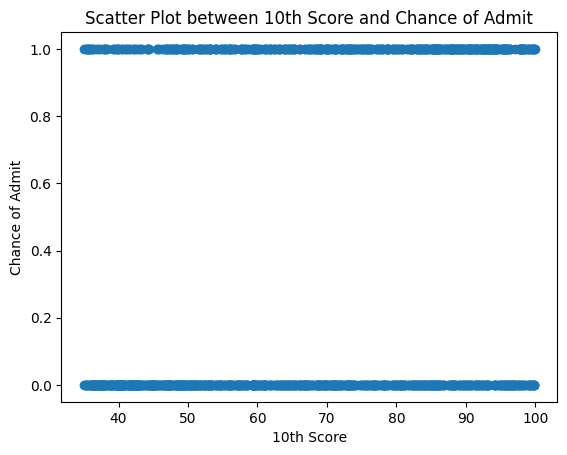

In [21]:
plt.scatter(dfm['10th_score'], dfm['Admission Decision'])
plt.xlabel('10th Score')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between 10th Score and Chance of Admit')
plt.show()

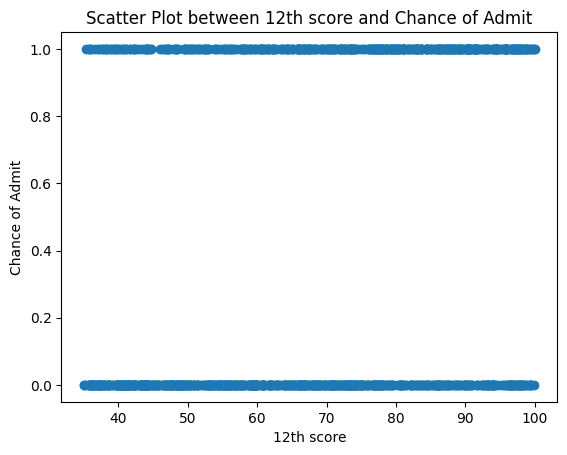

In [22]:
plt.scatter(dfm['12th_score'], dfm['Admission Decision'])
plt.xlabel('12th score')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between 12th score and Chance of Admit')
plt.show()

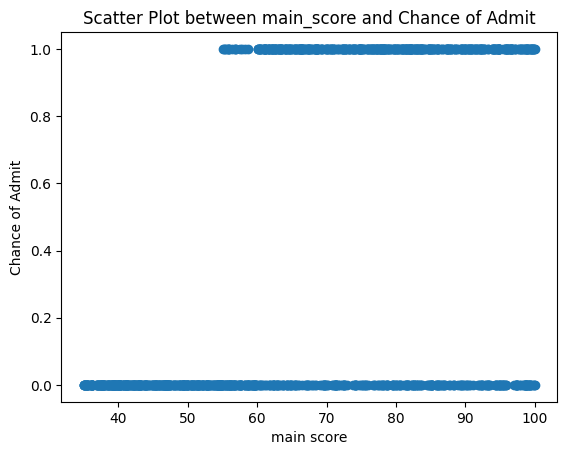

In [23]:
plt.scatter(dfm['main_score'], dfm['Admission Decision'])
plt.xlabel('main score')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between main_score and Chance of Admit')
plt.show()

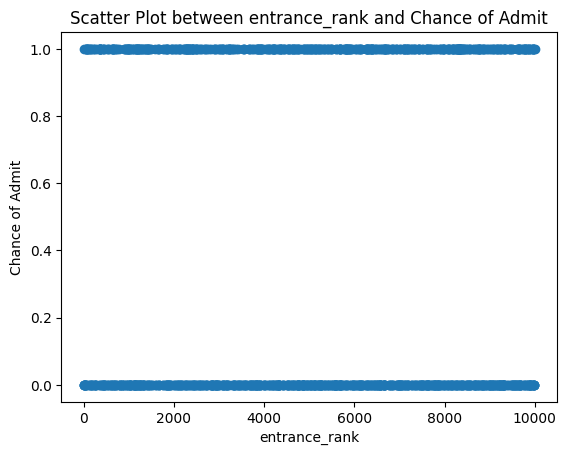

In [24]:
plt.scatter(dfm['entrance_rank'], dfm['Admission Decision'])
plt.xlabel('entrance_rank')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between entrance_rank and Chance of Admit')
plt.show()

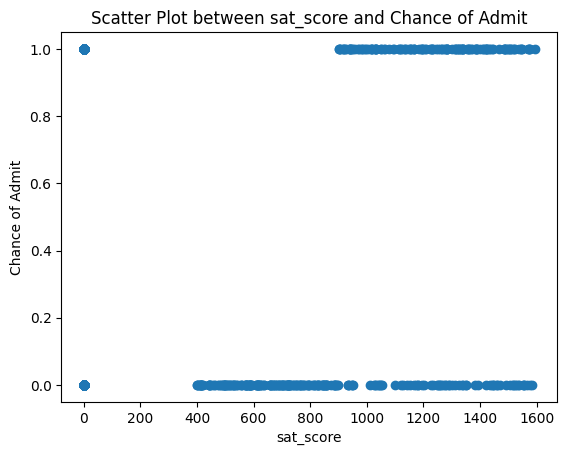

In [25]:
plt.scatter(dfm['sat_score'], dfm['Admission Decision'])
plt.xlabel('sat_score')
plt.ylabel('Chance of Admit')
plt.title('Scatter Plot between sat_score and Chance of Admit')
plt.show()

## Splitting of the data

In [26]:
dfm.shape

(1206, 9)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfm.drop(['Admission Decision'], axis = 1), dfm['Admission Decision'], test_size=0.2)


In [28]:
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (964, 8)
X_test shape: (242, 8)
y_train shape: (964,)
y_test shape: (242,)


In [29]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

## Gradient Boost Classfier 

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [31]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
gradient_booster.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",gradient_booster.score(X_test,y_test))

Train Score: 0.9802838946459411
Test Score: 0.9834710743801653


In [32]:
result_dict_train["Gradient-Boost Default Train Score"] = np.mean(accuracies)
result_dict_test["Gradient-Boost Default Test Score"] = gradient_booster.score(X_test,y_test)

In [33]:
from sklearn.metrics import accuracy_score
print("GBC accuracy is %2.2f" % accuracy_score(
     y_test, gradient_booster.predict(X_test)))

GBC accuracy is 0.98


In [34]:
from sklearn.metrics import classification_report

pred=gradient_booster.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.98      0.98      0.98        93

    accuracy                           0.98       242
   macro avg       0.98      0.98      0.98       242
weighted avg       0.98      0.98      0.98       242



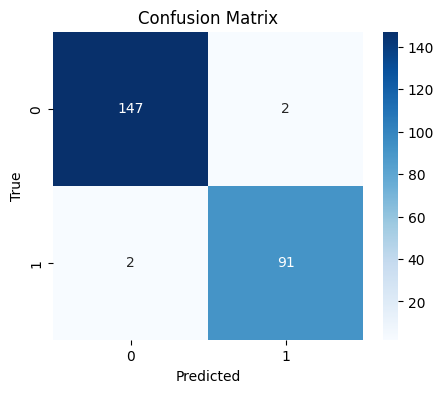

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = gradient_booster.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [36]:
grid = {
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':np.arange(100,500,100),
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, grid, cv = 4)
gb_cv.fit(X_train,y_train)
print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Train Score: 0.9823651452282158
Test Score: 0.9834710743801653


In [37]:
result_dict_train["Gradient-Boost GridSearch Train Score"] = gb_cv.best_score_
result_dict_test["Gradient-Boost GridSearch Test Score"] = gb_cv.score(X_test,y_test)

In [38]:
grid = {'max_depth':[2,3,4,5,6,7] }

gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=400)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 3}
Train Score: 0.9823651452282158
Test Score: 0.9834710743801653


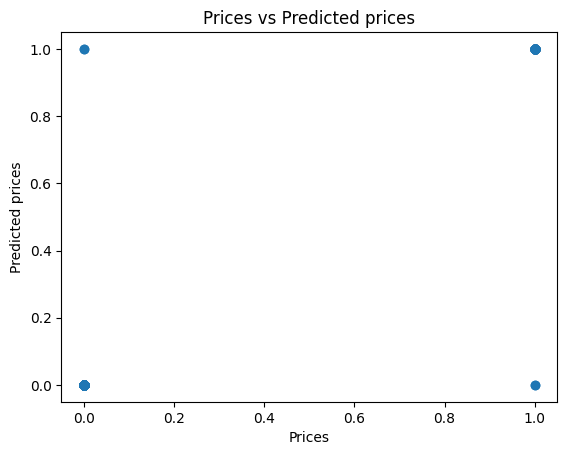

In [39]:
y_pred = gb_cv.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

## SVC

In [40]:
from sklearn.svm import SVC
svc = SVC(random_state = 101)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.5809153713298791
Test Score: 0.6157024793388429


In [41]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(X_test,y_test)

In [42]:
# grid = {
#     'C':[0.01,0.1,1,10],
#     'kernel' : ["linear","poly","rbf","sigmoid"],
#     'degree' : [1,3,5,7],
#     'gamma' : [0.01,1]
# }

# svm  = SVC ()
# svm_cv = GridSearchCV(svm, grid, cv = 5)
# svm_cv.fit(X_train,y_train)
# print("Best Parameters:",svm_cv.best_params_)
# print("Train Score:",svm_cv.best_score_)
# print("Test Score:",svm_cv.score(X_test,y_test))

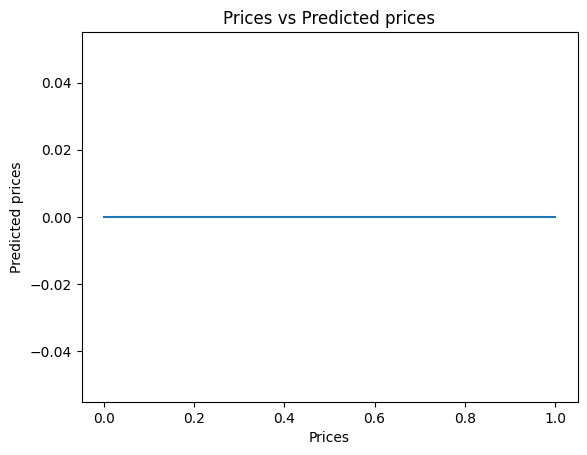

In [43]:
y_pred=svc.predict(X_test)
plt.plot(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [54]:
pred=svc.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       149
           1       0.00      0.00      0.00        93

    accuracy                           0.62       242
   macro avg       0.31      0.50      0.38       242
weighted avg       0.38      0.62      0.47       242



C:\Users\bhargava\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhargava\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhargava\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

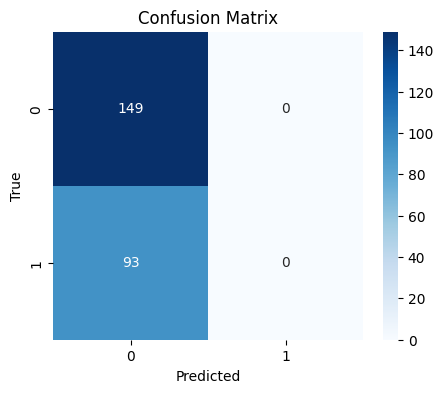

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = svc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


classifier = GaussianNB()
accuracies = cross_val_score(classifier, X_train, y_train, cv=5)
classifier.fit(X_train, y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",classifier.score(X_test,y_test))

Train Score: 0.8174384715025906
Test Score: 0.8305785123966942


In [45]:
result_dict_train["Naive Bayes Default Train Score"] = np.mean(accuracies)
result_dict_test["Naive Bayes Default Test Score"] = classifier.score(X_test,y_test)

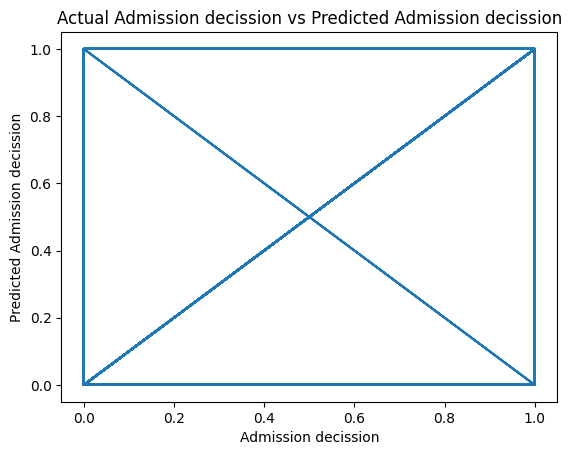

In [46]:
y_pred = classifier.predict(X_test)
plt.plot(y_test, y_pred)
plt.xlabel("Admission decission")
plt.ylabel("Predicted Admission decission")
plt.title("Actual Admission decission vs Predicted Admission decission")
plt.show()

In [55]:
pred=classifier.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       149
           1       0.82      0.71      0.76        93

    accuracy                           0.83       242
   macro avg       0.83      0.81      0.82       242
weighted avg       0.83      0.83      0.83       242



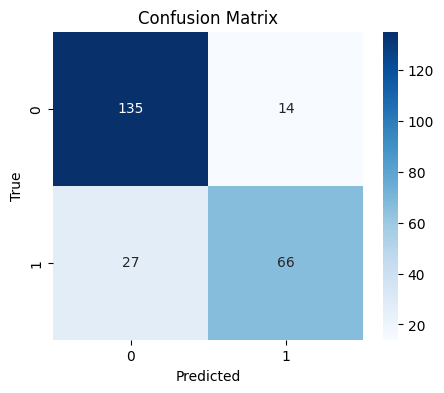

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gradient_booster and X_test, y_test are already defined

# Make predictions
pred = classifier.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Neural Networks

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so 'sigmoid' activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
# print(f'Test accuracy: {test_acc * 100:.2f}%')

# Print training accuracy
train_acc = history.history['accuracy'][-1]
print(f'Training accuracy: {train_acc * 100:.2f}%')

Epoch 1/50
25/25 [==============================] - 1s 17ms/step - loss: 0.6488 - accuracy: 0.6524 - val_loss: 0.5887 - val_accuracy: 0.7409
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5545 - accuracy: 0.7704 - val_loss: 0.5087 - val_accuracy: 0.7876
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4937 - accuracy: 0.7808 - val_loss: 0.4440 - val_accuracy: 0.7876
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7990 - val_loss: 0.4007 - val_accuracy: 0.8031
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8197 - val_loss: 0.3677 - val_accuracy: 0.8083
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8327 - val_loss: 0.3414 - val_accuracy: 0.8342
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8521 - val_loss: 0.3222 - val_accuracy: 0.8601
Epoch 8/50
25/25 [=

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (Previous code)

# Train the model
#history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test_scaled)

# Compute ROC curve and area under the curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
test_acc = model.evaluate(X_test_scaled, y_test)[1]
print(f'Test accuracy: {test_acc*100:.2f}%')
train_acc = history.history['accuracy'][-1]
print(f'Training accuracy: {train_acc * 100:.2f}%')



8/8 [==============================] - 0s 2ms/step - loss: 0.1570 - accuracy: 0.9339
Test accuracy: 93.39%
Training accuracy: 99.61%


<Figure size 800x800 with 0 Axes>

In [50]:
from sklearn.metrics import classification_report

# Assuming you have trained your model as described in your code
# and you have X_test_scaled and y_test

# Make predictions on the test set
y_probs = model.predict(X_test_scaled)
y_pred = (y_probs > 0.5).astype(int)  # Assuming a threshold of 0.5 for binary classification

# Convert y_test to 1D array if it's not already
y_test = np.squeeze(y_test)

# Print the classification report
print(classification_report(y_test, y_pred))

8/8 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       149
           1       0.93      0.89      0.91        93

    accuracy                           0.93       242
   macro avg       0.93      0.93      0.93       242
weighted avg       0.93      0.93      0.93       242



8/8 [==============================] - 0s 858us/step


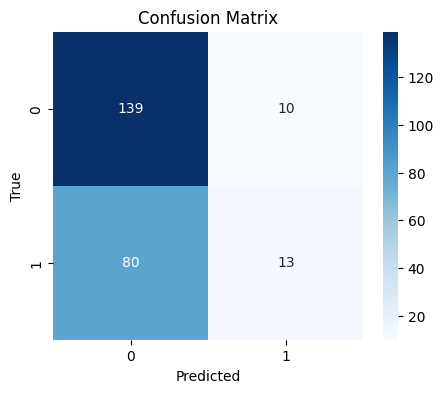

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_test, y_test, and model are already defined

# Make predictions
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## ROC curve

In [51]:
# # auc roc curve

# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# # generate two class dataset
# X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# # split into train-test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)



# # train models
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

# # logistic regression
# model1 = LogisticRegression()
# # knn
# model2 = KNeighborsClassifier(n_neighbors=4)

# # fit model
# model1.fit(X_train, y_train)
# model2.fit(X_train, y_train)

# # predict probabilities
# pred_prob1 = model1.predict_proba(X_test)
# pred_prob2 = model2.predict_proba(X_test)


# from sklearn.metrics import roc_curve

# # roc curve for models
# fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


# from sklearn.metrics import roc_auc_score

# # auc scores
# auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

# print(auc_score1, auc_score2)

8/8 [==============================] - 0s 2ms/step


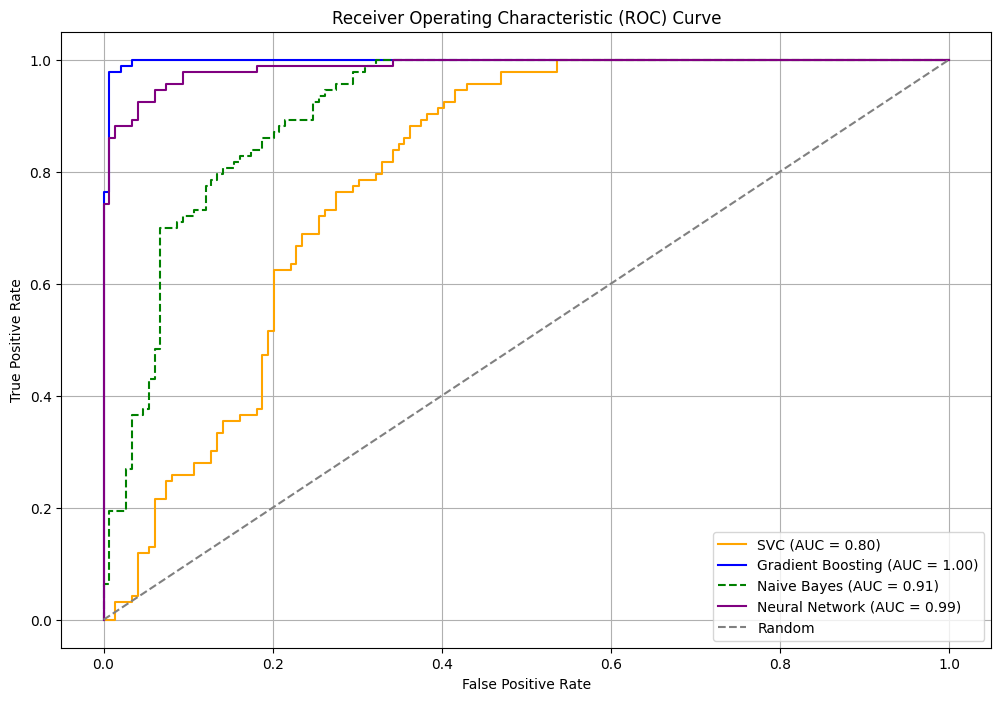

In [53]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have trained classifiers named svc, gradient_booster, and classifier
classifiers = [svc, gradient_booster, classifier]
labels = ['SVC', 'Gradient Boosting', 'Naive Bayes', 'Neaural Network']
colors = ['orange', 'blue', 'green', 'yellow']

# Initialize a plot
plt.figure(figsize=(12, 8))

# Plot ROC curve for each classifier
for classifier, label, color in zip(classifiers, labels, colors):
    # Assuming X_test and y_test are your test data
    if isinstance(classifier, SVC):
        y_scores = classifier.decision_function(X_test)
    else:
        y_scores = classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve with different line styles and colors
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})', color=color, linestyle='--' if label == 'Naive Bayes' else '-')

# Plot ROC curve for the neural network
y_probs = model.predict(X_test_scaled)
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})', color='purple', linestyle='-')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
